<a href="https://colab.research.google.com/github/AlbinB/Text-Analytics-NLP/blob/main/1_1_6_%2BIteration%2Bto%2BExplore%2BData%2BSets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture Notes

<h2>Text Similarity</h2>

**Text similarity models let us compare documents without deciding how to categorize them first.**

The second kind of core model that we’ll cover is called text similarity. The basic idea here is that, if we can measure how similar two words or two texts are, then we can cluster documents into groups. For example, let’s say I can measure that Charles Dickens writes more like to Anthony Trollope than Ernest Hemingway (and I can). Then we do that for every pair of writers. Now we have a network of relationships between them that we can cluster into groups: Victorian British writers vs. 20th century American men, for example. There are a lot of novelists, but not so many that we as individuals couldn’t spend our lives doing just that kind of analysis. But a machine can do it for 300 million tweets a day no problem. Automation lets us focus on tasks that actually require human intelligence.

A search engine is based on similarity models: the goal is to find the set of web pages (a type of document) whose content is most similar to your query. The challenge, of course, is that there isn’t always an explicit connection between search terms (“home brew”) and the topic (“beer”). So our text similarity model needs to learn that there is a topic in the background that can show up across various terms like “fermenter” and “siphon” and “yeast.” You might search for “how to start a home brew” when you actually need to find a page about how to soak your grains.

Part of text similarity is the relationship between two texts in isolation. That means that we just compare Dickens and Trollope on their own. But sometimes we want to know the relationship between all the texts in a larger data set: the whole web for a search engine or all English novels for a study of author style. When we do this, we need a single fixed point for comparison. For example, we could define the location of every city in the world using its angle and distance from Rome. Then we use these two numbers to represent where each city is located. Some similarity models work in just this way: we pick an arbitrary point in linguistic space and map our texts relative to that point. We’ll be talking about the metaphor of linguistic space in future sections, so for now just hold that as something to think about.

Texts can be similar to one another because they have similar content or because they have similar authors. While search engines work on content similarity, we could also imagine a search engine that works by author (news articles by Canadian women) or by sentiment (news articles that have a positive view of city cycling). The point is that if we can measure a particular property of a text, then we can find other texts with that same property: content or author or sentiment.

* **Words vs. Documents**. A similarity model can be used to cluster documents, but it can also be used to cluster words. Later in the course we will see how to do both tasks. These two problems are related: for example, we could start with word similarity to see that “home brew” and “beer” and “keg” and “yeast” are all words that occur in a single topic. Then, a text similarity model can start by knowing which words are related to one another. This is helpful because we are often looking for documents about a topic that don’t necessarily contain all our exact search terms.

* **Unsupervised Learning**. You’ll notice that text similarity doesn’t require humans to define categories in advance. On the one hand, this means it is possible for artificial intelligence to find categories that humans aren’t aware of. We might think of “home brew” as a topic that includes “beer” and “yeast” but forget about “bottles” and “sanitization” and “hops.” An unsupervised model is easier to get started with, because we don’t have the initial work of creating a category system. On the other hand, it is much harder in practice to get these models to work well. The basic problem is that if we don’t tell the model exactly what we want, we might not like what we get. AI might tell us that “home brew” is most similar to making your own jam and pickled beets.


# Colab Setup

In [ ]:
# if you are running these labs in CoLab, you will first need to mount the drive and 
# copy text_analitics.py to path 

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
###Add text_analytics.py to path 
!cp "/content/drive/My Drive/Colab Notebooks/CourseWork/Text Analytics and Natural Language Processing/text_analytics.py" .
print("Done!")

Done!


# Lecture Lab

In this lab, we are going to practice *iterating* over our data. This is where we look at the data one bit at a time. We're going to look at three different files. For each file, we're going to look at the data one year at a time. And then we'll make a figure.

Let's get started!

In [ ]:
from text_analytics import text_analytics
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


ai = text_analytics()
print("Done!")

Done!


Now we have three sets of articles to look at, from *Business Insider* and *Politico* and *TechCrunch*. So here we define a list of filenames, and then we open each file in the list.

Once we've opened each file, we use groupby to look at each year on its own.

In [ ]:
files = ["Wordclouds.Business_Insider.gz", "Wordclouds.Politico.gz", "Wordclouds.TechCrunch.gz"]
for file in files:
    name = file
    file = os.path.join(ai.data_dir, file)
    df = pd.read_csv(file, index_col = 0)

    for year, year_df in df.groupby("Year"):
        print(name, year, len(year_df))
        
print("Done!")

Wordclouds.Business_Insider.gz 2016 3243
Wordclouds.Business_Insider.gz 2017 2874
Wordclouds.Business_Insider.gz 2018 2204
Wordclouds.Business_Insider.gz 2019 33729
Wordclouds.Business_Insider.gz 2020 15903
Wordclouds.Politico.gz 2016 12234
Wordclouds.Politico.gz 2017 12105
Wordclouds.Politico.gz 2018 9983
Wordclouds.Politico.gz 2019 9586
Wordclouds.Politico.gz 2020 2469
Wordclouds.TechCrunch.gz 2016 12898
Wordclouds.TechCrunch.gz 2017 12973
Wordclouds.TechCrunch.gz 2018 11955
Wordclouds.TechCrunch.gz 2019 11499
Wordclouds.TechCrunch.gz 2020 2770
Done!


It takes a few minutes to read through each of these files (most of that time is spent loading them into memory). But this code lets us iterate through a year-by-year census. Now, let's do it again, but this time we'll save the results and make a figure.

In [ ]:
files = ["Wordclouds.Business_Insider.gz", "Wordclouds.Politico.gz", "Wordclouds.TechCrunch.gz"]
counts = []
for file in files:
    name = file.replace("Wordclouds.","").replace(".gz","")
    file = os.path.join(ai.data_dir, file)
    df = pd.read_csv(file, index_col = 0)

    for year, year_df in df.groupby("Year"):
        counts.append([name, year, len(year_df)])
        
counts = pd.DataFrame(counts, columns = ["Dataset", "Year", "N. Articles"])
print(counts)
print("Done!")

             Dataset  Year  N. Articles
0   Business_Insider  2016         3243
1   Business_Insider  2017         2874
2   Business_Insider  2018         2204
3   Business_Insider  2019        33729
4   Business_Insider  2020        15903
5           Politico  2016        12234
6           Politico  2017        12105
7           Politico  2018         9983
8           Politico  2019         9586
9           Politico  2020         2469
10        TechCrunch  2016        12898
11        TechCrunch  2017        12973
12        TechCrunch  2018        11955
13        TechCrunch  2019        11499
14        TechCrunch  2020         2770
Done!


So that table gives us the results. And now we just plot it. This time we'll use the *seaborn* package rather than the native *pandas* plotting.

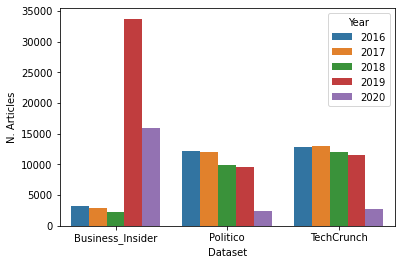

Done!


In [ ]:
sns.barplot(x = "Dataset", y = "N. Articles", hue = "Year", data = counts)
plt.show()
print("Done!")

And that's all for this lab! We've seen that we can iterate over files and categories in order to survey our data.